# Multi-Class Classification

### Objectives

1. Understand the use of one-hot encoding for categorical variables.
2. Implement logistic regression for multi-class clasification using *One-vs-All (OvA) and One-vs-One (OvO)* strategies.
3. Evaluate model performance using appropriate metrics.

Multi class clasificationm is a type of machine learning classification problem where the goal is to predict one of three or more possible classes or labels for each input instance. Unlike binary classification which involves two classes (e.g., yes/no, true/false), multiclass clasification deals with problems where there are multiple possible categories to cjhoose from. 

For example:
* In an image recognization task, the model might classify an image as one of several classes: 'Cat', 'dog' or 'bird'.
* In a text recognization task, the model could categorize an email as either 'spam', 'important', or 'general'.

Some key points about multicalss classification:
1. One-vs-All(OvA) - The moel trains multiple binary classifiers, each one distinguishing one class from the other.
2. One-vs-One(OvO) - The model trains binary classsifiers for every possible pair of classes.
3. Softmax Function - Often used in nueral networks for multi class clasification, it converts the output into probabilities and ensures the sum of all probabilites equals to 1.

In short, Multiclass clasification helps when we need to assign one of many possible labels to our input data.

In [1]:
#importing all required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## About the dataset

The data set being used for this lab is the "Obesity Risk Prediction" data set publically available on <a href="https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition">UCI Library</a> under the <a href="https://creativecommons.org/licenses/by/4.0/legalcode">CCA 4.0</a> license. The data set has 17 attributes in total along with 2,111 samples. 

The attributes of the dataset are descibed below.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7zrl">Variable Name</th>
    <th class="tg-7zrl">Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Gender</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Age</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Height</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Weight</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">family_history_with_overweight</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Has a family member suffered or suffers from overweight?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAVC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you eat high caloric food frequently?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FCVC</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">Do you usually eat vegetables in your meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NCP</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How many main meals do you have daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CAEC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Do you eat any food between meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SMOKE</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you smoke?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CH2O</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How much water do you drink daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SCC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you monitor the calories you eat daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAF</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How often do you have physical activity?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">TUE</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">How much time do you use technological devices such as cell phone, videogames, television, computer and others?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CALC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">How often do you drink alcohol?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">MTRANS</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Which transportation do you usually use?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NObeyesdad</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Obesity level</td>
  </tr>
</tbody></table>


In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv'
df = pd.read_csv(url)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Exploratory Data Analysis

Let's visualize the distribution of the target variable to understand the class balance.

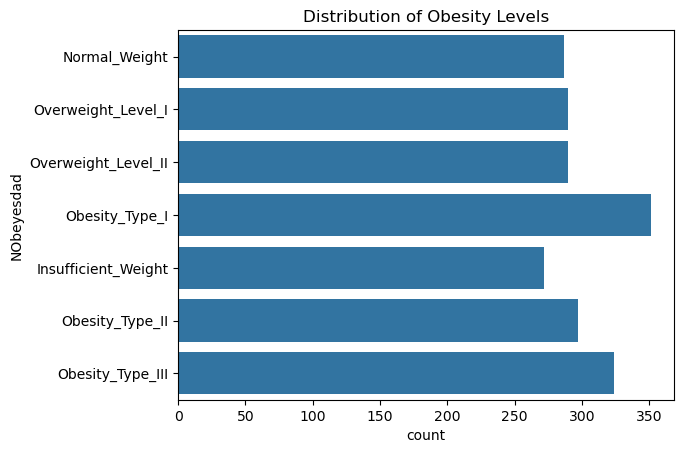

In [4]:
#distribution of target variable
sns.countplot(y = 'NObeyesdad', data = df)
plt.title('Distribution of Obesity Levels')
plt.show()

We can say that the dataset is fairly balanced if the no of samples in each class is roughly equal, meaning that no particular class dominates the data set significantly. This helps ensure that the model does not become biased towards the majority class and can learn to predict all classes effectively.

So, if data set have similar class count and no extreme differences, we can conclude that it is 'fairly balanced' and does not require bias mitigation techniques like oversampling, undersampling, or class-weighted loss function.

From the above graph for our data we can see the same, that is data is fairly balanced and does not require any special attention in terms of biased training.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Counts of null values for each column is zero for this dataset.

### Preprocessing the data

#### Feature scaling

Scale the numerical features to standardize their ranges for better model performance.

In [11]:
#standardizing continuous numerical features
continous_columns = df.select_dtypes(include = ['float64']).columns.tolist()
continous_columns

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[continous_columns])

In [16]:
#converting a dataframe
scaled_df = pd.DataFrame(scaled_features, columns = scaler.get_feature_names_out(continous_columns))

In [20]:
#combining with original data set
scaled_data = pd.concat([df.drop(columns=continous_columns), scaled_df], axis = 1)
scaled_data

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991


Standardization of data is important to better define the decision boundaries between calsses by making sure that the feature variations are in similar scales. The data is now ready for using tarining and testing.

### One-hot Encoding

One-hot encoding is a technique used to convert categorical variables into a numerical format that machine learning models can understand it. It represents each category as a binary vector where only one element is '1'(hot), and all other are '0'(cold)

Why Use One-hot encoding?

1. Removes ordinality - Unlike label encoding, it prevents the model from assuming a ranking or order in categorical values.
2. Helps in Machine Learning - Many algorithms (neural networks, logistic regression) work better with numerical inputs.

When to use?
1. When categorical variables do not have an inherent order (eg, 'dog', 'cat', 'bird')
2. When the no of unique categories is not too large (to-avoid-high dimensionality).

For large categories, label encoding or embedding techniques (e.g., word embeddings in NLP) might be preferable.

In [22]:
#IDENTIFYING CATEGORICAL COLUMNS
categorical_columns = scaled_data.select_dtypes(include = ['object']).columns.tolist()
categorical_columns.remove('NObeyesdad') #exclude target column

#applying one-hot encoding
encoder = OneHotEncoder(sparse_output = False, drop = 'first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

#converting to a data frame 
encoded_df = pd.DataFrame(encoded_features, columns = encoder.get_feature_names_out(categorical_columns))

#combining with the original data set
prepped_data = pd.concat([scaled_data.drop(columns = categorical_columns), encoded_df], axis = 1)
prepped_data

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Obesity_Type_III,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,Obesity_Type_III,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,Obesity_Type_III,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,Obesity_Type_III,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Now we can observe that all the categorical variables have now been modified to one-hot encoded features. This increases the over all number of feilds to 24.

Encode the target variable

In [23]:
#encodingh the target variable
prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Note - Why use `.cat.codes` instead of one-hot encoding?
1. This method is efficient when the target variable is ordinal or used for classification.
2. One-hot encoding would create multiple binary columns, increasing dimentionality.
3. However, if categories have no ordinal relationship, one-hot encoding might be a better choice.

In [24]:
#seperate the input and target data
X = prepped_data.drop('NObeyesdad', axis = 1)
y = prepped_data['NObeyesdad']

### Model training and evaluation

#### Splitting the data into training and testing data sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

### Logistic regression with One vs All

In the one vs all approach:

1. The algorithm trains a single binary classifier for each class.
2. Each classifier learns to distinguish a single class from all the other combined.
3. If there are k classes, k classifiers are trained.
4. During prediction, the algorithm evaluates al  classifiers on each input, and selects the class with the highest confidence score as the predicted class.

Advantages:

1. Simpler and more efficient in terms of the number of classifiers (k)
2. Easier to implement for the algorithms that naturally provide confidence scores (e.g., logistic regression, SVM).

Disadvantages:

1. Classifers may struggle with calss imbalance since each binary calssifier must distinguish between one class and the rest.
2. Requires the classifier to perform well even with highly imbalanced datasets, as the 'all' group ntypically contains more samples than the 'one' class.

Train a logistic regression model using the One vs All strategy and evaluate its performance.

In [27]:
#training logistic regression model using one-vs-all (default)
model_ova = LogisticRegression(multi_class = 'ovr', max_iter = 1000)  #here 'ovr' is 'one vs rest'/'one vs all'
model_ova.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

We can now evaluate the accuracy of the trained model as a measure of its performance on unseen testing data.

In [28]:
#predictions
y_pred_ova = model_ova.predict(X_test)

#evaluation metrics for OVA
print('One-vs-All (OvA) Strategy')
print(f'Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova), 2)}%')

One-vs-All (OvA) Strategy
Accuracy: 76.12%


### Logistic regression with One vs One (OvO)

In the one vs one approach:

1. The algorithm trains a binary classifier for every pair of classes in the dataset.
2. If there are k classes, this results in k(k-1)/2 classifiers.
3. Each classifier is trained to distingush between two specific classes, ignoring the rest.
4. During prediction, all clasifiers are used, and a 'voting' mechanism decides the final calss by seolecting the calss that wins the majority of pairwise comparisons.

Advantages:
1. Sutable for algorithms that are computationally expensive to train on many samples beacuse each binary classifer ndeals with a smaller dataset (only samples from two classes).
2. Can be more accurate in some cases since classifiers focus on distinguishing between two specific classes at a time.

Disadvantages:

1. Computationally expensive for data sets with a large number of classes due to large number of classifiers required.
2. May lead to ambiguous predictions if voting results in a tie.

let's train a logistic regression model using the One-vs-One (OvO) strategy and evaluate its performance.

In [30]:
#training logistic regression model using one vs one 
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter = 1000))
model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

Let's evaluate the accuracy of trained model as a measure of its performance on unseen testing data.

In [31]:
#predictions
y_pred_ovo = model_ovo.predict(X_test)

#evaluation metrics for OvO
print('One-vs-One (OvO) Strategy')
print(f'Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%')

One-vs-One (OvO) Strategy
Accuracy: 92.2%


Experiment with differnt test sizes in the train_test_split method (e.g., 0.1, 0.3) and observe the impact on model performance

In [34]:
for test_size in [0.1, 0.3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42, stratify = y)
    model_ova.fit(X_train, y_train)
    y_pred = model_ova.predict(X_test)
    print(f'Test Size: {test_size}')
    print('Accuracy: ', accuracy_score(y_test, y_pred))

Test Size: 0.1
Accuracy:  0.7594339622641509
Test Size: 0.3
Accuracy:  0.749211356466877


Lets plot a bar chart of feature importance using the coefficients from the One vs All logistic regression model. Also try for the One vs One model

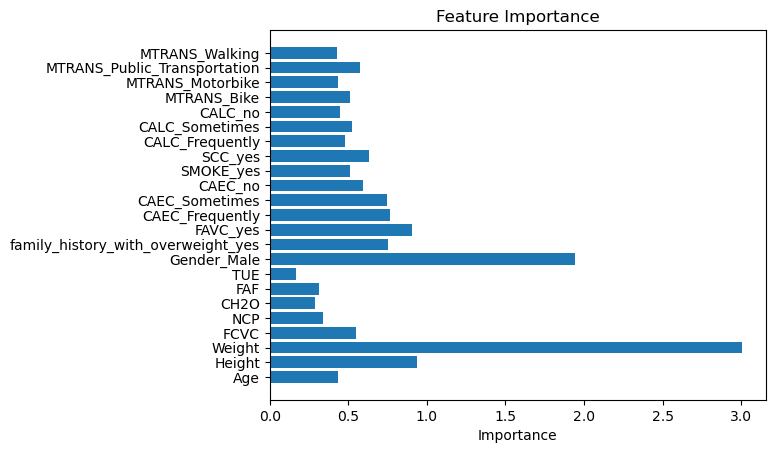

In [39]:
feature_importance = np.mean(np.abs(model_ova.coef_), axis = 0)
plt.barh(X.columns, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

1. OneVsOneClassifier (OvO) trains multiple binary classifiers, each distinguishing between a pair of classes.

2. Unlike Logistic Regression, which has a single coefficient matrix (.coef_), OvO trains separate models for different class pairs.

3. Since each binary classifier works independently, the OneVsOneClassifier wrapper does not store a single .coef_ attribute.

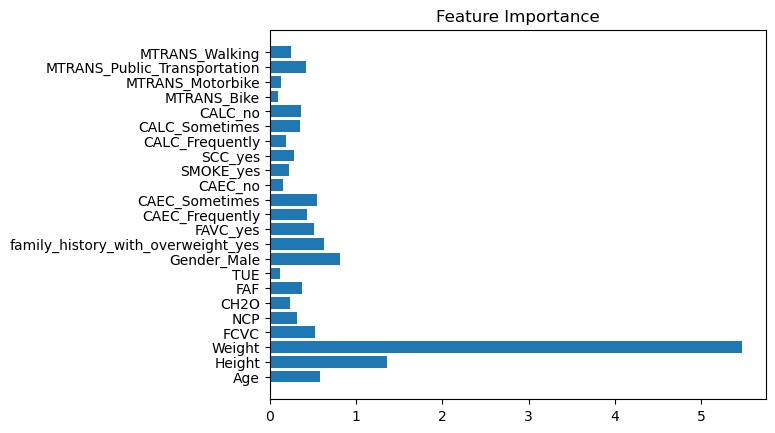

In [42]:
#feature importance for model_OVO
import numpy as np

# Extract feature importances from each binary classifier
ovo_estimators = [est.coef_ for est in model_ovo.estimators_]

# Compute the mean importance across all classifiers
feature_importance = np.mean(np.abs(ovo_estimators), axis=0)

# Flatten the array (since OvO creates multiple models)
feature_importance = np.mean(feature_importance, axis=0)

# Plot Feature Importance
import matplotlib.pyplot as plt
plt.barh(X.columns, feature_importance)
plt.title('Feature Importance')
plt.show()

Let's create a function `obesity_risk_pipeline` to automate the entire pipeline.

1. Loading and Preprocessing the data.
2. Training the model
3. Evaluating the model

The function should accept the file path and test set size as the input arguments.

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

url = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv')


def obesity_risk_pipeline(url, test_size=0.2):  # url is the file path
    # Load data
    df = pd.read_csv(url)

    # Standardizing continuous numerical features
    continuous_columns = df.select_dtypes(include=['float64']).columns.tolist()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[continuous_columns])

    # Converting to a DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

    # Combining with the original dataset
    scaled_data = pd.concat([df.drop(columns=continuous_columns), scaled_df], axis=1)

    # Identifying categorical columns
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')  # Exclude target column

    # Applying one-hot encoding
    encoder = OneHotEncoder(sparse=False, drop='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

    # Converting to a DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

    # Combining with the original dataset
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

    # Encoding the target variable
    prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes

    # Preparing final dataset
    X = prepped_data.drop('NObeyesdad', axis=1)
    y = prepped_data['NObeyesdad']

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Training the model
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Printing accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Example Usage
# obesity_risk_pipeline("path/to/dataset.csv")